### Lab 1

In [1]:
from Grammar.GrammarClass import Grammar
from FiniteAutomaton.FiniteAutomatonClass import FiniteAutomaton
from Lexer.LexerClass import *
from ChomskyForm.ChomskyClass import Chomsky
from Parser.ParserClass import Parser
from collections import deque

from PySimpleAutomata import DFA, automata_IO

In [11]:
VN=['S', 'D', 'F']
VT=['a', 'b', 'c', 'd']
P={ 'S':['aS', 'bS', 'cD'], 
    'D':['dD', 'bF', 'a'], 
    'F':['bS', 'a'] }

In [12]:
# instantiate the grammar object
grammar = Grammar(VN=VN, VT=VT, P=P, S='S')

In [13]:
# generate 5 strings
for i in range(5):
    string = grammar.generate_string()
    print(string)
    grammar.delete_string()


cba
acda
abbbaca
cba
baacbbababcdba


In [14]:
# convert to finite automaton
fa = grammar.to_finite_automaton()


#### Check the finite automaton 


In [15]:
fa.check_automaton('aaaabbbbcbda')

False

In [16]:
fa.check_automaton('aaaabbbbcba')

True

### Lab 2


#### Check the grammar type

In [17]:
grammar.check_grammar()

The grammar is type 3


#### Transform from finite automaton to grammar

In [18]:
states = ["q0","q1","q2"]
alphabet = ["a","b"]
F = ["q2"]
transitions = {
    ("q0","a", 1) : ["q0"],
    ("q1","b", 2) : ["q1"],
    ("q1","b", 3) : ["q2"],
    ("q0","b", 4) : ["q1"],
    ("q1","a", 5) : ["q0"],
    ("q2","b", 6) : ["q1"],
}

In [19]:
fa = FiniteAutomaton(Q=states, Sigma=alphabet, delta=transitions, q0="q0", F=F)

In [20]:
VN, VT, P = fa.finite_automaton_to_regular_grammar()

In [21]:
VN, VT, P

(['q0', 'q1', 'q2'],
 ['a', 'b'],
 {'q0': ['aq0', 'bq1'], 'q1': ['bq1', 'bq2', 'aq0'], 'q2': ['bq1']})

#### Check if the finite automaton is deterministic or non-deterministic

In [22]:
fa.is_deterministic()

False

#### Transform from nfa to dfa

In [23]:
dfa_states, alphabet, dfa_transitions, dfa_final_states = fa.nfa_to_dfa()
print(dfa_states)
print(alphabet)
print(dfa_final_states)
dfa_transitions

{'q0', 'q1q2', 'q1'}
{'b', 'a'}
{'q1q2'}


{'q0': {'a': 'q0', 'b': 'q1'},
 'q1': {'b': 'q1q2', 'a': 'q0'},
 'q1q2': {'b': 'q1q2', 'a': 'q0'}}

#### Draw the fa

In [24]:
from automathon import DFA

automata1 = DFA(dfa_states, alphabet, dfa_transitions, "q0", dfa_final_states)
# This is an example about creating a DFA with the library

In [25]:
automata1.isValid()

True

In [26]:
automata1.view("DFA Visualization2")

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng', '-O', 'DFA Visualization2.gv'], make sure the Graphviz executables are on your systems' PATH

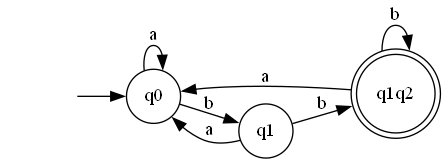

In [ ]:
from PIL import Image

im = Image.open("DFA Visualization2.gv.png")

im

## Lab 3

#### Lexer

In [10]:
code_test = '''SELECT col1, col2, col3 FROM table1 WHERE col1 >= 30'''

lexer = Lexer(code_test)
tokens = lexer.tokenize()
for token in tokens:
    print(token.print_token()) 

Token(type=SELECT, value='SELECT', line=1, column=0)
Token(type=ID, value='col1', line=1, column=7)
Token(type=COMMA, value=',', line=1, column=11)
Token(type=ID, value='col2', line=1, column=13)
Token(type=COMMA, value=',', line=1, column=17)
Token(type=ID, value='col3', line=1, column=19)
Token(type=FROM, value='FROM', line=1, column=24)
Token(type=ID, value='table1', line=1, column=29)
Token(type=WHERE, value='WHERE', line=1, column=36)
Token(type=ID, value='col1', line=1, column=42)
Token(type=COMPARATOR, value='>=', line=1, column=47)
Token(type=NUMBER, value='30', line=1, column=50)


## Lab 4

### Chomsky Normal Form

In [ ]:
VN = ['S', 'A', 'B', 'C', 'E']
VT = ['a', 'b']
P = {'S': ['aB', 'AC', 'A'], 
     'A': ['a', 'ACSC', 'BC', 'ASC', 'ACS', 'B', 'AS'], 
     'B': ['b', 'aA'], 
     'C': ['', 'BA'], 
     'E': ['bB']}

In [ ]:
chomsky = Chomsky(VN, VT, P, "S").transform()
print("VN = ", chomsky[0])
print("VT = ", chomsky[1])
print("P = ", chomsky[2])

VN =  ['S', 'A', 'B', 'C', 'E', 'Z', 'Y', 'X', 'W']
VT =  ['a', 'b']
P =  {'A': ['AS', 'WC', 'YA', 'b', 'a', 'ZS', 'XC', 'BC'], 'S': ['AS', 'WC', 'YA', 'b', 'YB', 'a', 'AC', 'XC', 'ZS', 'BC'], 'C': ['BA'], 'B': ['b', 'YA'], 'Z': 'AC', 'Y': 'a', 'X': 'AS', 'W': 'ZS'}


## Lab 5

#### Parser

In [13]:
code_test2 = '''SELECT name, age, address FROM customers WHERE age > 25 ORDER_BY name;'''

lexer = Lexer(code_test2)
tokens = lexer.tokenize()
parser = Parser(tokens)
parse_tree = parser.parse()

In [14]:
print(parse_tree.print_tree())

SELECT_STATEMENT
	SELECT: SELECT
	COLUMN_LIST
		ID: name
		ID: age
		ID: address
	FROM: FROM
	ID: customers
	WHERE_CLAUSE
		WHERE: WHERE
		EXPRESSION
			ID: age
			COMPARATOR: >
			NUMBER: 25
	ORDER_BY_CLAUSE
		ORDER_BY: ORDER_BY
		ID: name
	END: ;

